[](http://)

#                                     **PREDICTION OF DEPRESSION, ANXIETY AND STRESS**

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
data=pd.read_csv('dass21.csv')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,education,gender,age,married
0,1,11,4719,4,25,2122,2,16,1944,4,...,3,30,7001,2,9,5265,2,2,16,1
1,2,22,2670,1,36,2890,2,35,4777,3,...,1,16,3023,2,30,3755,2,2,16,1
2,4,28,2888,1,33,4373,4,41,3242,1,...,1,16,4258,4,42,1883,2,2,17,1
3,1,6,4061,3,11,6837,2,37,5521,1,...,2,15,3125,1,13,4112,1,2,13,1
4,3,32,4776,2,13,7731,3,5,4156,4,...,4,15,3502,3,21,10694,3,2,19,1


In [3]:
# Cleaning DataSets
data.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I',
       'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E',
       'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E',
       'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E',
       'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E',
       'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'education', 'gender',
       'age', 'married'],
      dtype='object')

In [4]:
data_1 = data.copy()
time = [i for i in data_1.iloc[:, 0:63] if 'E' in i]
position = [i for i in data_1.iloc[:, 0:63] if 'I' in i]
# Drop time and position related data
data_1=data_1.drop(position, axis=1)
data_1 = data_1.drop(time, axis=1)
data_1 = data_1[data_1.married != 0]
data_1 = data_1[data_1.gender != 0]
data_1 = data_1[data_1.education != 0]
data_1=data_1.replace([np.inf, -np.inf], np.nan)
data_1=data_1.dropna()
print('Columns', data_1.columns)

Columns Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'education', 'gender', 'age', 'married'],
      dtype='object')


In [5]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_1['Age_Groups']=data_1['age'].apply(condition)
data_1.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q17A,Q18A,Q19A,Q20A,Q21A,education,gender,age,married,Age_Groups
0,1,4,2,4,4,4,4,4,3,1,...,3,4,4,3,2,2,2,16,1,Primary Children
1,2,1,2,3,2,4,2,2,1,2,...,4,2,2,1,2,2,2,16,1,Primary Children
2,4,1,4,1,4,3,1,1,2,4,...,4,2,2,1,4,2,2,17,1,Secondary Children
3,1,3,2,1,2,3,4,1,4,3,...,3,1,1,2,1,1,2,13,1,Primary Children
4,3,2,3,4,3,2,4,4,4,3,...,4,4,4,4,3,3,2,19,1,Secondary Children


In [6]:
new_data = data_1.iloc[:, 21:]
new_data.head()

,education,gender,age,married,Age_Groups
0,2,2,16,1,Primary Children
1,2,2,16,1,Primary Children
2,2,2,17,1,Secondary Children
3,1,2,13,1,Primary Children
4,3,2,19,1,Secondary Children


In [7]:
data_2 = data_1.filter(regex='Q\d{1,2}A')
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A
0,1,4,2,4,4,4,4,4,3,1,...,4,4,4,3,4,3,4,4,3,2
1,2,1,2,3,2,4,2,2,1,2,...,4,3,2,4,2,4,2,2,1,2
2,4,1,4,1,4,3,1,1,2,4,...,3,1,3,1,4,4,2,2,1,4
3,1,3,2,1,2,3,4,1,4,3,...,2,2,1,1,3,3,1,1,2,1
4,3,2,3,4,3,2,4,4,4,3,...,4,4,3,4,3,4,4,4,4,3


In [8]:
def sub(data_2):
    return data_2.subtract(1,axis=1)
data_3=sub(data_2) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20],
             'Stress': [1, 6, 8, 11, 12, 14, 18]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

**Scoring as per given answers for the respective set of Depression,Anxiety,Stress questions**

In [9]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

**After scoring is done combining these three sets back with the the rest of the table**

**Therefore now have 3 dataframes to work with as of Depression,Anxiety,Stress**

 # Depression Set

In [10]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Total_Count
0,1,3,0,3,3,2,1,13
1,1,1,1,2,1,3,1,10
2,3,3,3,0,3,3,3,18
3,1,1,2,1,2,2,0,9
4,2,2,2,3,2,3,2,16


In [11]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Total_Count,education,gender,age,married,Age_Groups
0,1,3,0,3,3,2,1,13,2,2,16,1,Primary Children
1,1,1,1,2,1,3,1,10,2,2,16,1,Primary Children
2,3,3,3,0,3,3,3,18,2,2,17,1,Secondary Children
3,1,1,2,1,2,2,0,9,1,2,13,1,Primary Children
4,2,2,2,3,2,3,2,16,3,2,19,1,Secondary Children


In [12]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Total_Count,education,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,1,13,2,2,16,1,Primary Children,Mild
1,1,1,1,2,1,3,1,10,2,2,16,1,Primary Children,Mild
2,3,3,3,0,3,3,3,18,2,2,17,1,Secondary Children,Moderate
3,1,1,2,1,2,2,0,9,1,2,13,1,Primary Children,Normal
4,2,2,2,3,2,3,2,16,3,2,19,1,Secondary Children,Moderate


Text(0.5, 1.0, 'Depression Level Distribution')

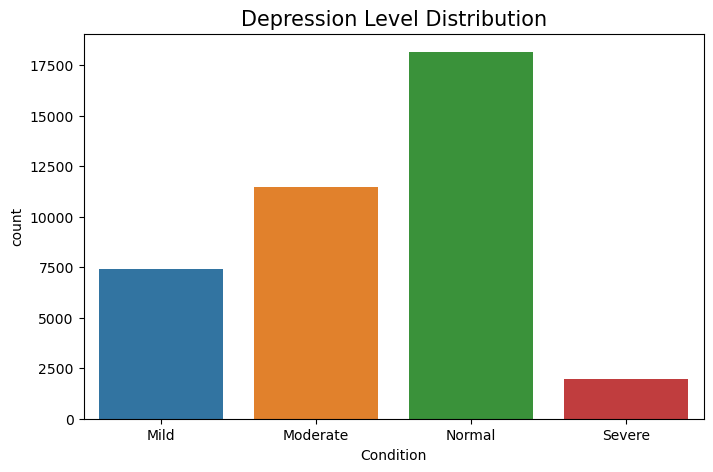

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=Depression.sort_values('Condition').Condition)
plt.title('Depression Level Distribution',fontsize=15)

**Changing variables for Correlation**

In [14]:
Depr=Depression.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Depr['Condition']=Depr['Total_Count'].apply(condition)
Depr['Age_Groups']=Depr['age'].apply(cond)
Depr=Depr.drop(columns=['age','Total_Count'])
Depr.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,education,gender,married,Age_Groups,Condition
0,1,3,0,3,3,2,1,2,2,1,1,1
1,1,1,1,2,1,3,1,2,2,1,1,1
2,3,3,3,0,3,3,3,2,2,1,2,2
3,1,1,2,1,2,2,0,1,2,1,1,0
4,2,2,2,3,2,3,2,3,2,1,2,2


<Axes: >

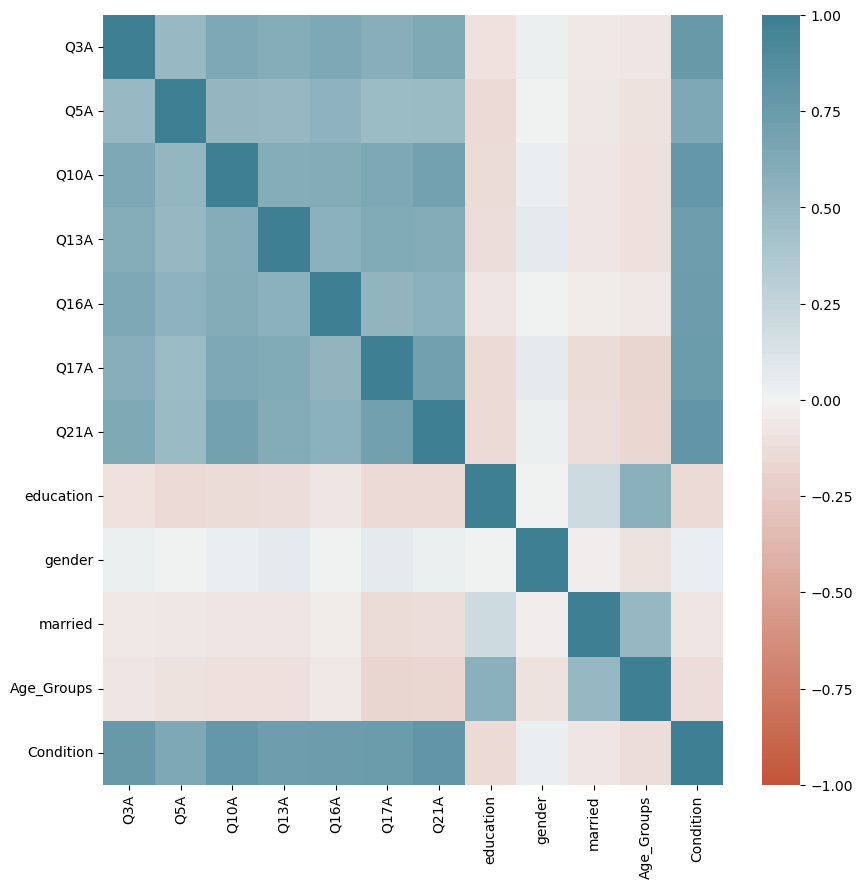

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(Depr.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# Stress Set

In [16]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Total_Count
0,0,3,3,3,3,3,3,18
1,1,3,1,1,3,1,1,11
2,3,2,0,1,2,2,1,11
3,0,2,0,2,1,0,0,5
4,2,1,3,2,3,2,3,16


In [17]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Total_Count,education,gender,age,married,Age_Groups
0,0,3,3,3,3,3,3,18,2,2,16,1,Primary Children
1,1,3,1,1,3,1,1,11,2,2,16,1,Primary Children
2,3,2,0,1,2,2,1,11,2,2,17,1,Secondary Children
3,0,2,0,2,1,0,0,5,1,2,13,1,Primary Children
4,2,1,3,2,3,2,3,16,3,2,19,1,Secondary Children


In [18]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Total_Count,education,gender,age,married,Age_Groups,Condition
0,0,3,3,3,3,3,3,18,2,2,16,1,Primary Children,Mild
1,1,3,1,1,3,1,1,11,2,2,16,1,Primary Children,Normal
2,3,2,0,1,2,2,1,11,2,2,17,1,Secondary Children,Normal
3,0,2,0,2,1,0,0,5,1,2,13,1,Primary Children,Normal
4,2,1,3,2,3,2,3,16,3,2,19,1,Secondary Children,Mild


Text(0.5, 1.0, 'People Condition for Stress Level')

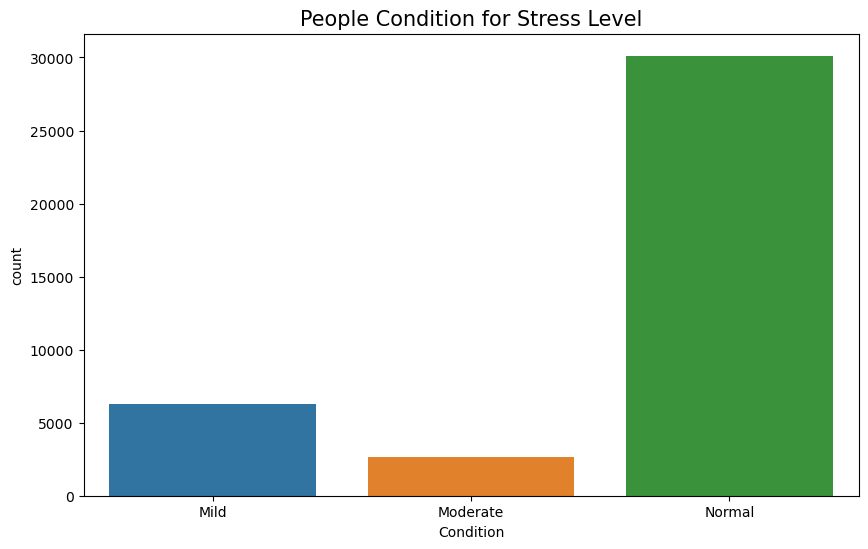

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=Stress.sort_values('Condition').Condition)
plt.title('People Condition for Stress Level',fontsize=15)

**Changing variables for Correlation**

In [20]:
Str=Stress.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Str['Condition']=Str['Total_Count'].apply(condition)
Str['Age_Groups']=Str['age'].apply(cond)
Str=Str.drop(columns=['age','Total_Count'])
Str.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,education,gender,married,Age_Groups,Condition
0,0,3,3,3,3,3,3,2,2,1,1,2
1,1,3,1,1,3,1,1,2,2,1,1,1
2,3,2,0,1,2,2,1,2,2,1,2,1
3,0,2,0,2,1,0,0,1,2,1,1,0
4,2,1,3,2,3,2,3,3,2,1,2,2


<Axes: >

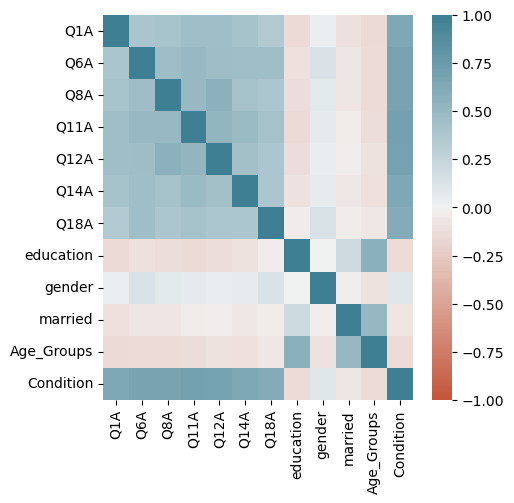

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(Str.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# Anxiety Set

In [22]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Total_Count
0,3,3,3,2,2,3,2,18
1,0,2,1,0,3,1,0,7
2,0,0,0,1,0,1,0,2
3,2,0,3,3,0,0,1,9
4,1,3,3,3,3,3,3,19


In [23]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Total_Count,education,gender,age,married,Age_Groups
0,3,3,3,2,2,3,2,18,2,2,16,1,Primary Children
1,0,2,1,0,3,1,0,7,2,2,16,1,Primary Children
2,0,0,0,1,0,1,0,2,2,2,17,1,Secondary Children
3,2,0,3,3,0,0,1,9,1,2,13,1,Primary Children
4,1,3,3,3,3,3,3,19,3,2,19,1,Secondary Children


In [24]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Total_Count,education,gender,age,married,Age_Groups,Condition
0,3,3,3,2,2,3,2,18,2,2,16,1,Primary Children,Severe
1,0,2,1,0,3,1,0,7,2,2,16,1,Primary Children,Normal
2,0,0,0,1,0,1,0,2,2,2,17,1,Secondary Children,Normal
3,2,0,3,3,0,0,1,9,1,2,13,1,Primary Children,Mild
4,1,3,3,3,3,3,3,19,3,2,19,1,Secondary Children,Severe


Text(0.5, 1.0, 'People Condition for Anxiety Level')

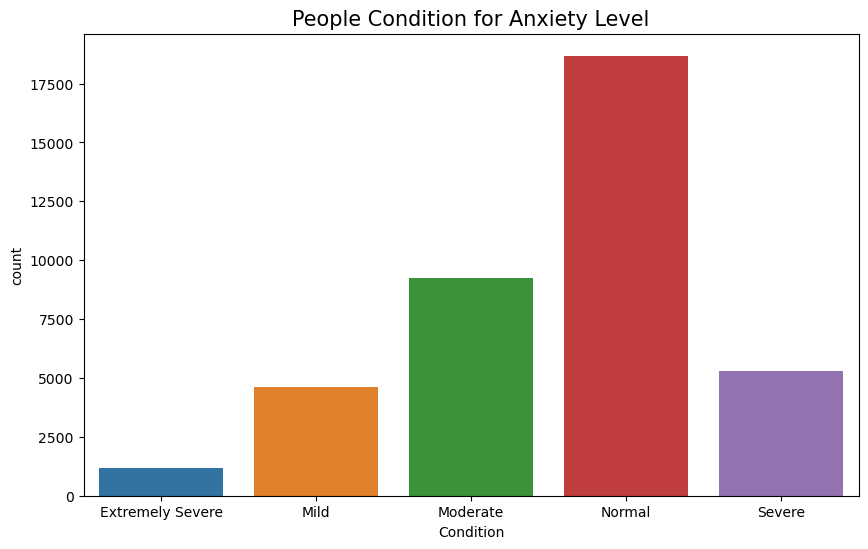

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x=Anxiety.sort_values('Condition').Condition)
plt.title('People Condition for Anxiety Level',fontsize=15)

**Changing variables for Correlation**

In [26]:
Anx=Anxiety.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Anx['Condition']=Anx['Total_Count'].apply(condition)
Anx['Age_Groups']=Anx['age'].apply(cond)
Anx=Anx.drop(columns=['age','Total_Count'])
Anx.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,education,gender,married,Age_Groups,Condition
0,3,3,3,2,2,3,2,2,2,1,1,2
1,0,2,1,0,3,1,0,2,2,1,1,0
2,0,0,0,1,0,1,0,2,2,1,2,0
3,2,0,3,3,0,0,1,1,2,1,1,0
4,1,3,3,3,3,3,3,3,2,1,2,2


<Axes: >

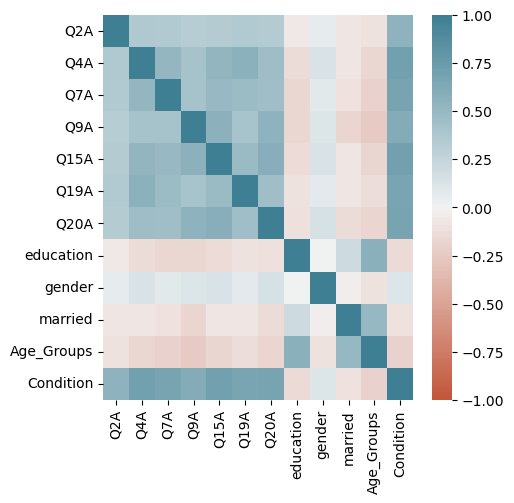

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(Anx.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

# **Comparing different answers given for situations like gender, marriage, education, races etc and comparing with their Anxiety, Depression or Stress Conditions**

# Genders

* 1=Male
* 2=Female
* 3=Other

In [28]:
print('Count of People participated as of Gender\n',data_1['gender'].value_counts())

Count of People participated as of Gender
 gender
2    29819
1     8644
3      546
Name: count, dtype: int64


Text(0.5, 1.0, 'Depression Condition based on Gender')

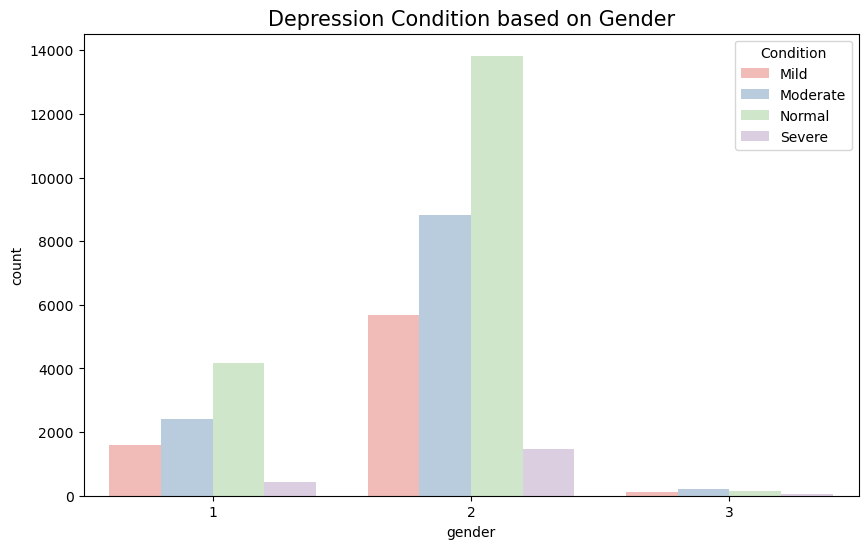

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=Depression.sort_values('gender').gender,hue=Depression['Condition'],palette='Pastel1')
plt.title('Depression Condition based on Gender',fontsize=15)

Text(0.5, 1.0, 'Stress Condition based on Gender')

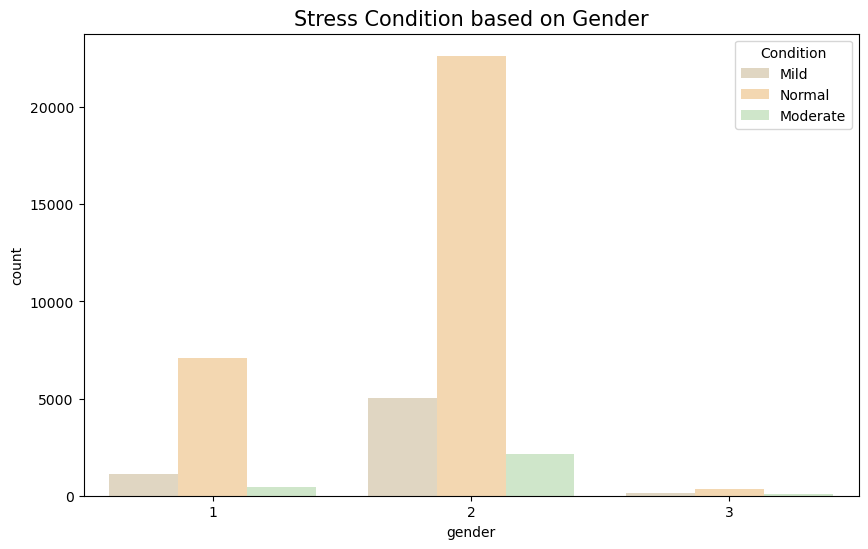

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=Stress.sort_values('gender').gender,hue=Stress['Condition'],palette='Pastel1_r')
plt.title('Stress Condition based on Gender',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition based on Gender')

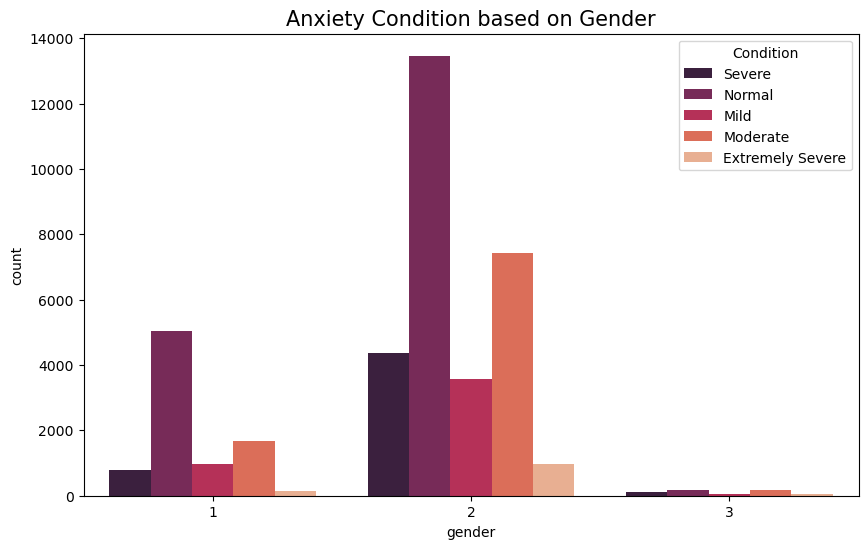

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x=Anxiety.sort_values('gender').gender,hue=Anxiety['Condition'],palette='rocket')
plt.title('Anxiety Condition based on Gender',fontsize=15)

# Martial Status

* 1=Never married
* 2=Currently married
* 3=Previously married

In [32]:
Depression['married'].value_counts()

married
1    33663
2     4278
3     1068
Name: count, dtype: int64

*People participating were mostly single and not married at the time of answers*

Text(0.5, 1.0, 'Depression State of People as of Married or Not')

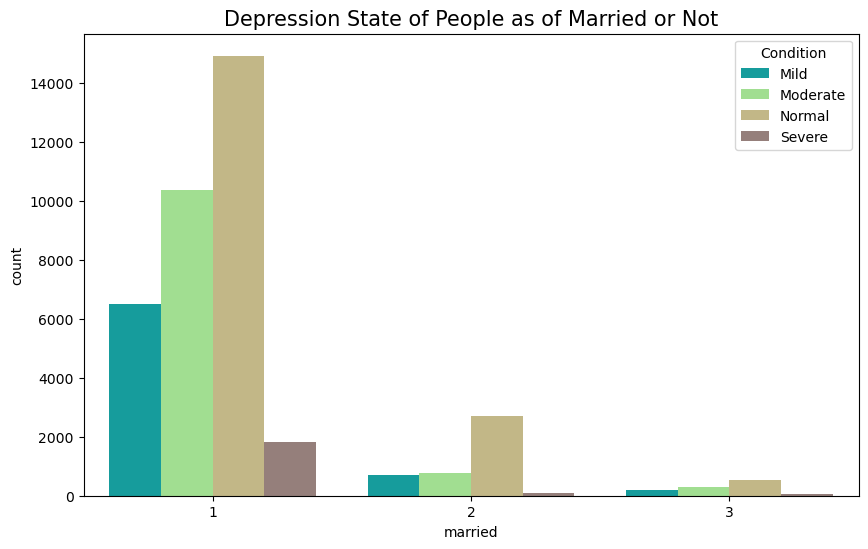

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x=Depression.sort_values('married').married,hue=Depression['Condition'],palette='terrain')
plt.title('Depression State of People as of Married or Not',fontsize=15)


Text(0.5, 1.0, 'Stress State of People as of Married or Not')

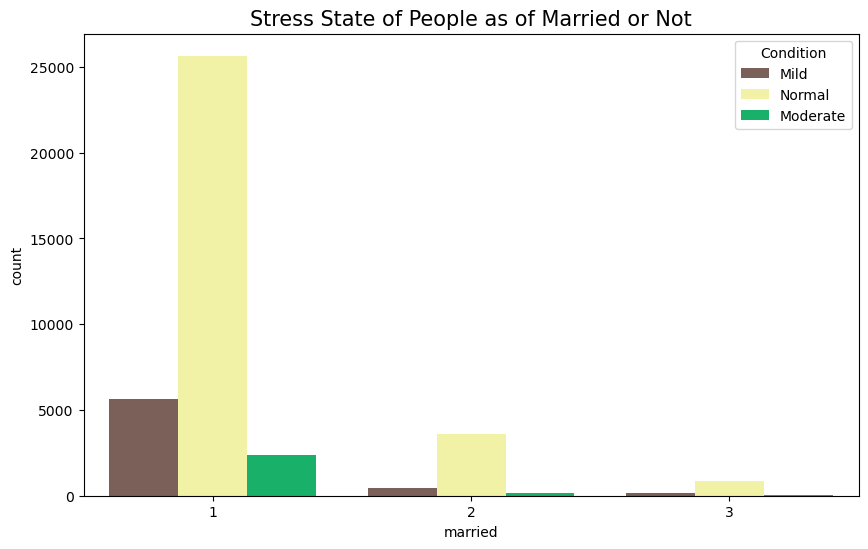

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x=Stress.sort_values('married').married,hue=Stress['Condition'],palette='terrain_r')
plt.title('Stress State of People as of Married or Not',fontsize=15)

Text(0.5, 1.0, 'Anxiety State of People as of Married or Not')

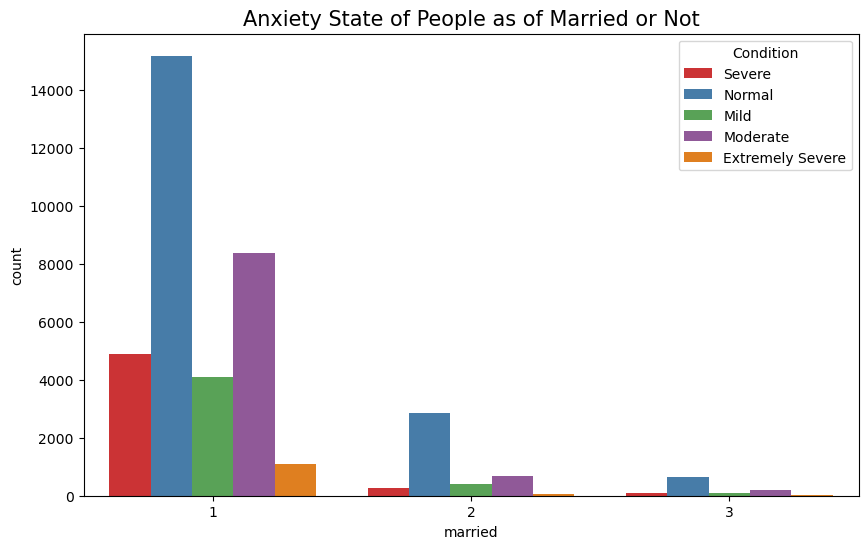

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x=Anxiety.sort_values('married').married,hue=Anxiety['Condition'],palette='Set1')
plt.title('Anxiety State of People as of Married or Not',fontsize=15)

**Comparing results**
> Never Married
* Moslty had extremely severe conditions for Depression and Anxiety.

> Married
* Moslty were normal

> Divorced
* As per the people participated Most people were in Extreme Severe for depressive state

# Age Groups

*Where*
* Under 10
* Primary(10-16)
* Secondary(17-21)
* Adults(21-35)
* Elder Adults(36-48)
* Older people(49+)
       

In [36]:
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Total_Count,education,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,1,13,2,2,16,1,Primary Children,Mild
1,1,1,1,2,1,3,1,10,2,2,16,1,Primary Children,Mild
2,3,3,3,0,3,3,3,18,2,2,17,1,Secondary Children,Moderate
3,1,1,2,1,2,2,0,9,1,2,13,1,Primary Children,Normal
4,2,2,2,3,2,3,2,16,3,2,19,1,Secondary Children,Moderate


Text(0.5, 1.0, 'Depression Condition as per different Age Groups')

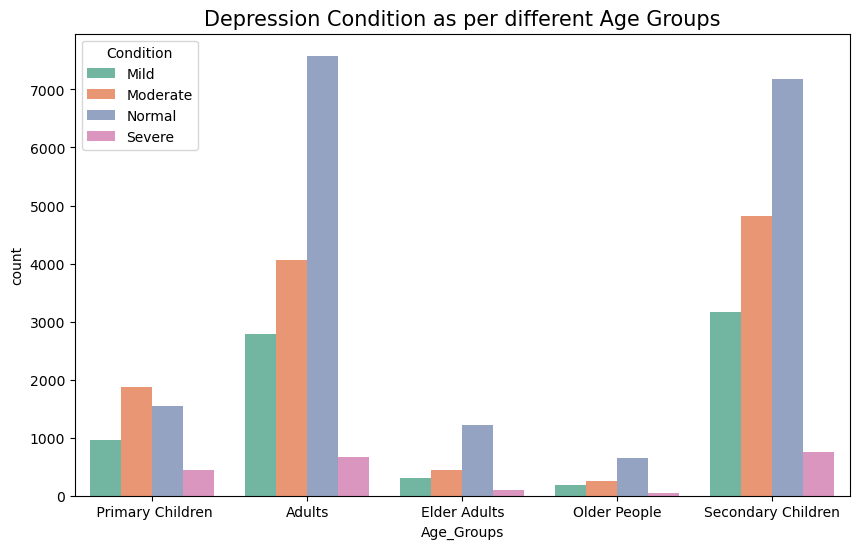

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x=Depression.sort_values('Age_Groups').Age_Groups,hue=Depression['Condition'],palette='Set2')
plt.title('Depression Condition as per different Age Groups',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different Age Groups')

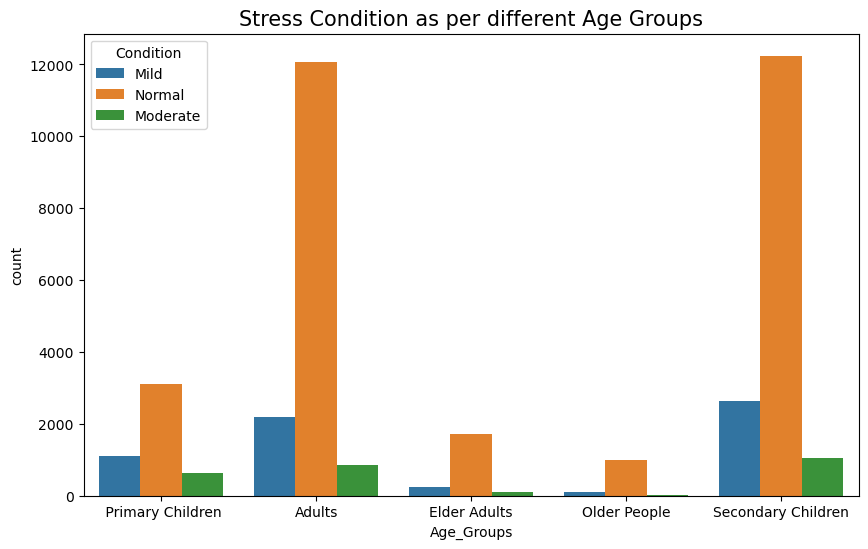

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x=Stress.sort_values('Age_Groups').Age_Groups,hue=Stress['Condition'])
plt.title('Stress Condition as per different Age Groups',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per different Age Groups')

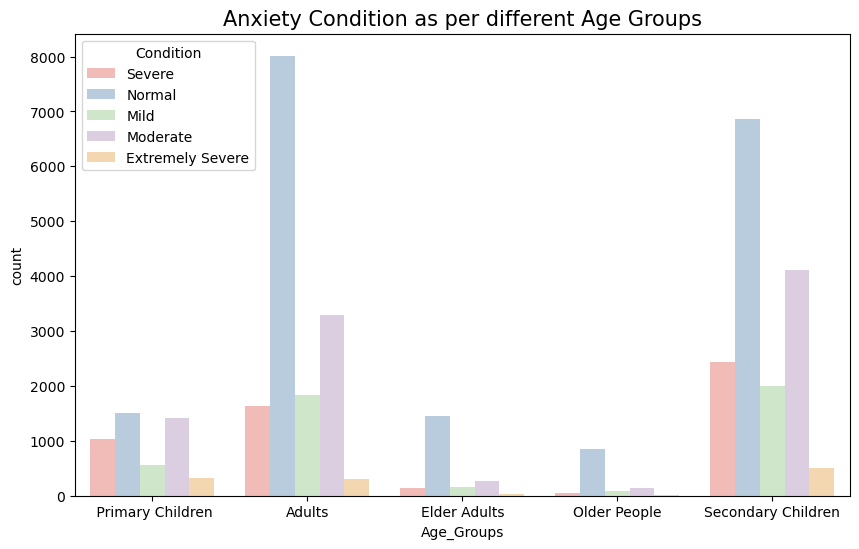

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x=Anxiety.sort_values('Age_Groups').Age_Groups,hue=Anxiety['Condition'],palette='Pastel1')
plt.title('Anxiety Condition as per different Age Groups',fontsize=15)

# Education level

*  1=Less than high school 
*  2=High school
*  3=University degree
*  4=Graduate degree

In [40]:
print('Counts of answered recorded as per the Education \n',data_1['education'].value_counts())

Counts of answered recorded as per the Education 
 education
3    15050
2    14948
4     4987
1     4024
Name: count, dtype: int64


Text(0.5, 1.0, 'Depression Condition as per different Education levels')

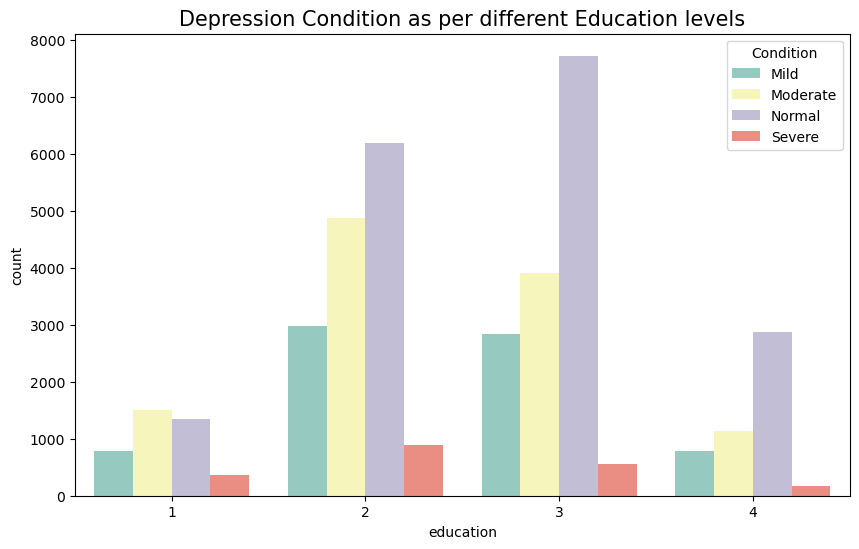

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x=Depression.sort_values('education').education,hue=Depression['Condition'],palette='Set3')
plt.title('Depression Condition as per different Education levels',fontsize=15)

Text(0.5, 1.0, 'Stress Condition as per different Education levels')

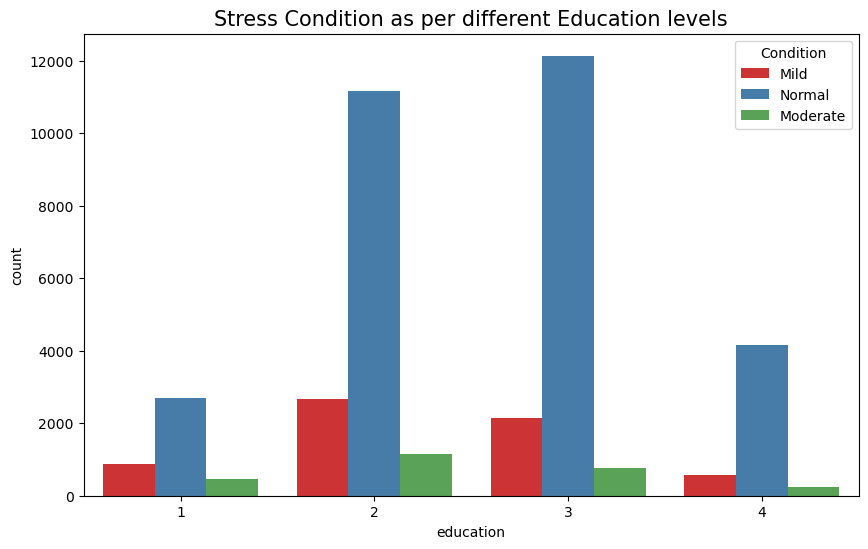

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x=Stress.sort_values('education').education,hue=Stress['Condition'],palette='Set1')
plt.title('Stress Condition as per different Education levels',fontsize=15)

Text(0.5, 1.0, 'Anxiety Condition as per different Education levels')

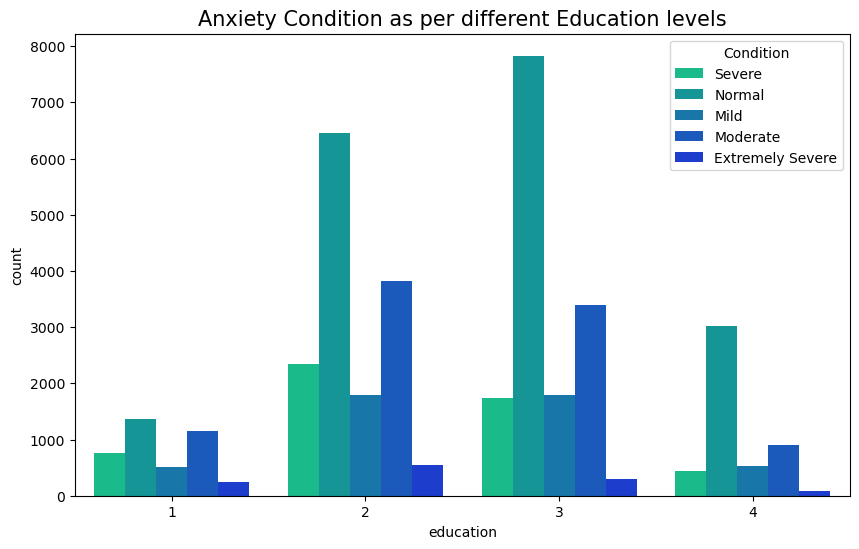

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x=Anxiety.sort_values('education').education,hue=Anxiety['Condition'],palette='winter_r')
plt.title('Anxiety Condition as per different Education levels',fontsize=15)

In [44]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    

    
Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)



In [45]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [46]:
Depression=Depression.drop(columns=['Total_Count','age'])
Stress=Stress.drop(columns=['Total_Count','age'])
Anxiety=Anxiety.drop(columns=['Total_Count','age'])


# Model Creation for predictions

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error


 >  # 1. Model for Depression

In [48]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A',
              'education', 'gender', 'married', 'Age_Groups']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (22217, 11) (22217, 1)
Test Set: (11963, 11) (11963, 1)


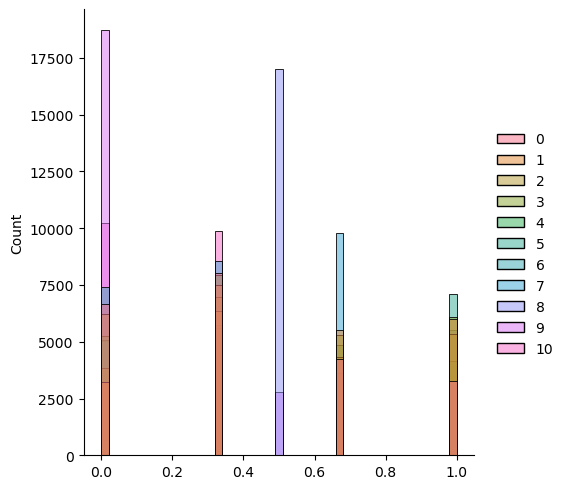

In [50]:
sns.displot(X_train_scaled)

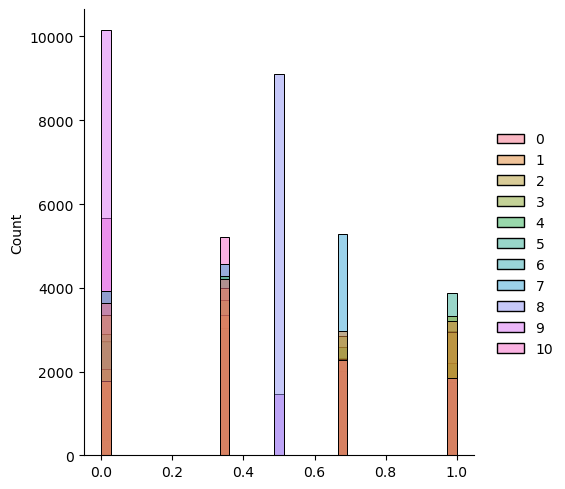

In [51]:
sns.displot(X_test_scaled)

**Random Forest**

/tmp/ipykernel_122873/2333039171.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.977
F1_Score: 0.977
Recall_Score: 0.977
Precision_Score: 0.977


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: Fut

Cross Validation Score: 0.976
              precision    recall  f1-score   support

        Mild     0.9301    0.9460    0.9380      2223
    Moderate     0.9761    0.9822    0.9792      3374
      Normal     0.9932    0.9831    0.9881      5803
      Severe     1.0000    1.0000    1.0000       563

    accuracy                         0.9768     11963
   macro avg     0.9749    0.9778    0.9763     11963
weighted avg     0.9770    0.9768    0.9768     11963



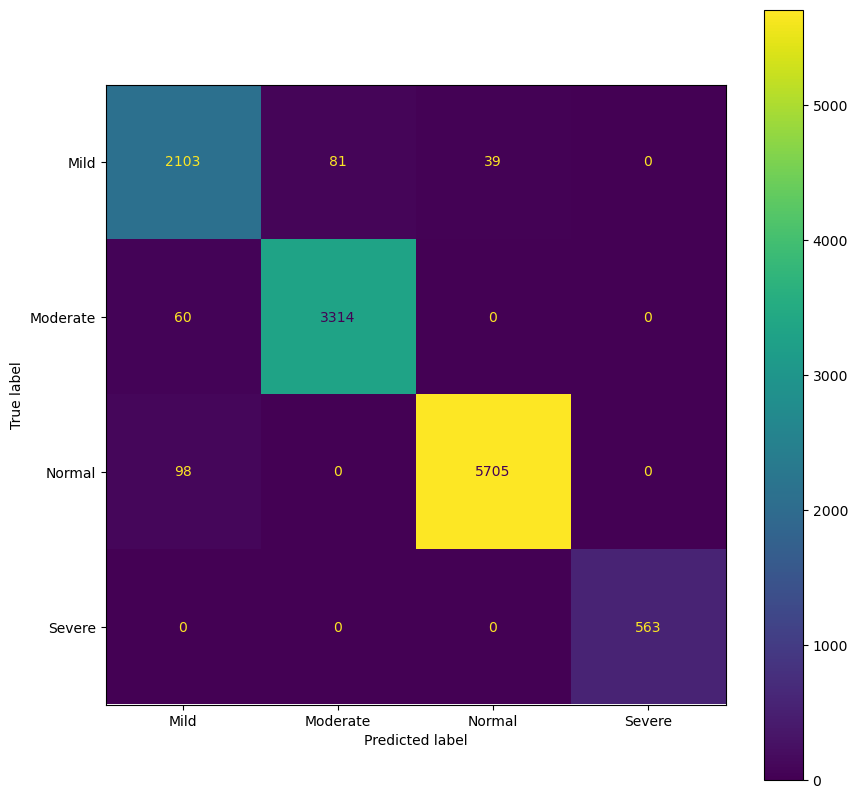

In [52]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(RanFor, X_test_scaled, y_test, ax=ax)

In [53]:
cm = confusion_matrix(y_test, RanFor.predict(X_test_scaled))
print('Confusion Matrix: ', cm)

Confusion Matrix:  [[2103   81   39    0]
 [  60 3314    0    0]
 [  98    0 5705    0]
 [   0    0    0  563]]


**Support Vector Machines**

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score: 1.0
              precision    recall  f1-score   support

        Mild     1.0000    1.0000    1.0000      2223
    Moderate     1.0000    1.0000    1.0000      3374
      Normal     1.0000    1.0000    1.0000      5803
      Severe     1.0000    1.0000    1.0000       563

    accuracy                         1.0000     11963
   macro avg     1.0000    1.0000    1.0000     11963
weighted avg     1.0000    1.0000    1.0000     11963



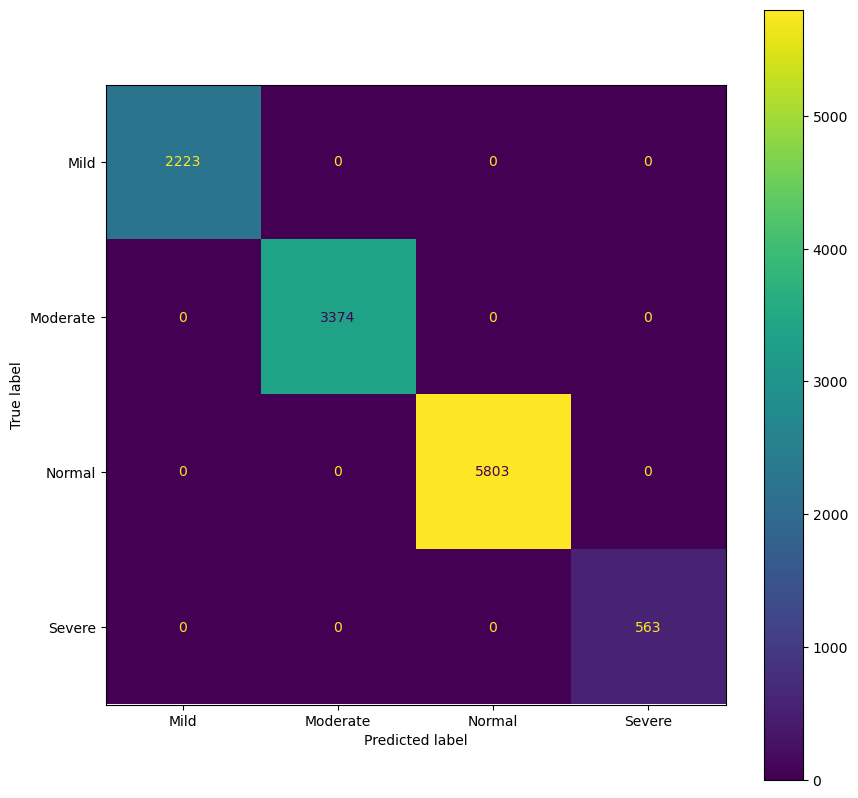

In [54]:
from sklearn.svm import SVC
svm=SVC(C=100,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test, ax=ax)

In [55]:
confusion_matrix(y_test, svm.predict(X_test_scaled))

array([[2223,    0,    0,    0],
       [   0, 3374,    0,    0],
       [   0,    0, 5803,    0],
       [   0,    0,    0,  563]])

In [56]:
Result={
                  'Model':['Random-Forest','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)
Result_Depression                                                                                           

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,97.7,97.7,97.7,97.7
1,SVM,100.0,100.0,100.0,100.0


# # 2. Model For Stress

In [57]:
Stress.columns

Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'education',
       'gender', 'married', 'Age_Groups', 'Condition'],
      dtype='object')

In [58]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'education', 
          'gender', 'married', 'Age_Groups']]
y=Stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

/tmp/ipykernel_122873/3863851241.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran=RandomForestClassifier().fit(X_train_scaled,y_train)


Accuracy: 0.984
F1_Score: 0.984
Recall_Score: 0.984
Precision_Score: 0.984


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.9842013661688102
              precision    recall  f1-score   support

        Mild     0.9501    0.9454    0.9477      1832
    Moderate     0.9971    0.9971    0.9971       695
      Normal     0.9896    0.9906    0.9901      9436

    accuracy                         0.9840     11963
   macro avg     0.9789    0.9777    0.9783     11963
weighted avg     0.9840    0.9840    0.9840     11963



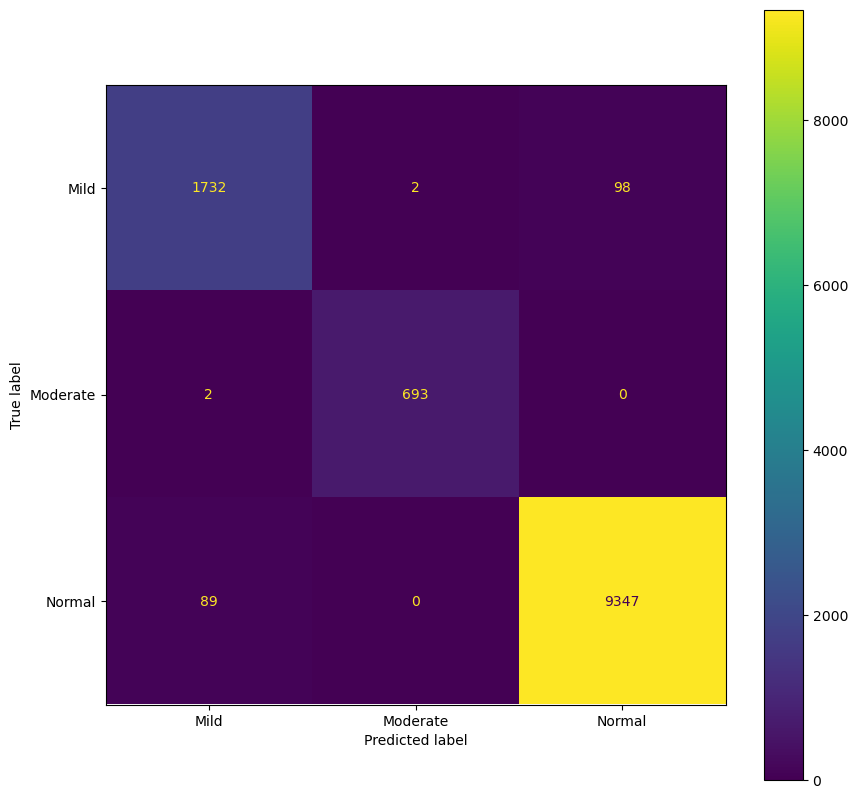

In [59]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(ran, X_test_scaled, y_test, ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)

**Decision Tree**

**Support Vector Machines**

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score: 0.9991897852812457
              precision    recall  f1-score   support

        Mild     1.0000    1.0000    1.0000      1832
    Moderate     1.0000    1.0000    1.0000       695
      Normal     1.0000    1.0000    1.0000      9436

    accuracy                         1.0000     11963
   macro avg     1.0000    1.0000    1.0000     11963
weighted avg     1.0000    1.0000    1.0000     11963



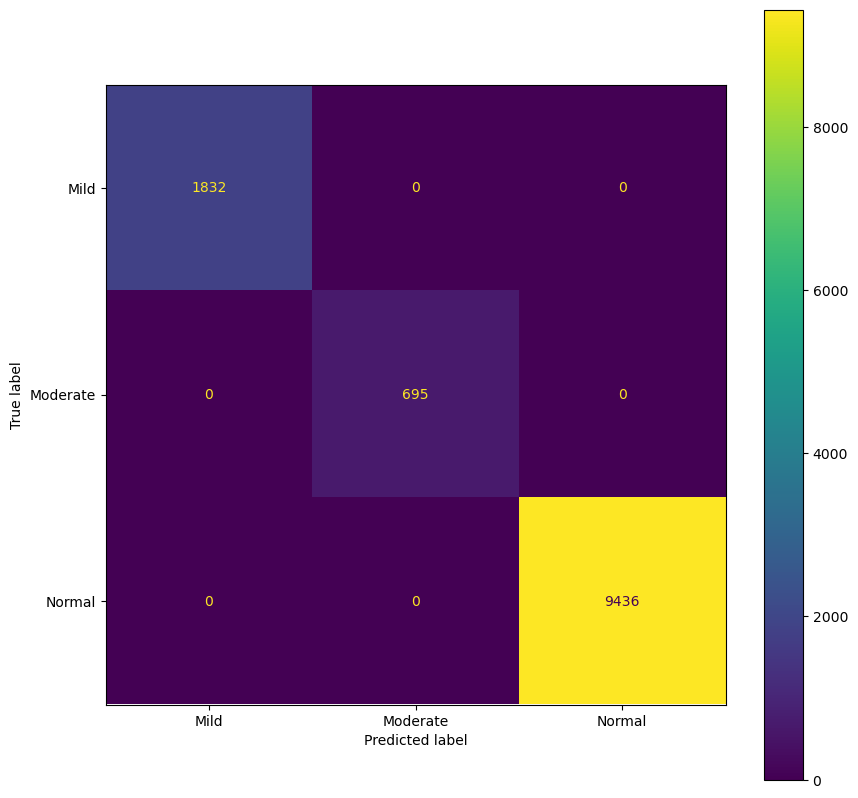

In [60]:
Svm=SVC(C=10, gamma=0.01, kernel='sigmoid').fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(Svm, X_test_scaled, y_test, ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)

In [61]:
Result_1={
                  'Model':['Random-Forest','SVM'],
                  'Accuracy(%)':[acc_ran*100,acc_svm*100],
                  'F1_Score(%)':[F1_ran*100,F1_svm*100],
                  'Precision(%)':[prec_ran*100,prec_svm*100],
                  'Recall(%)':[rec_ran*100,rec_svm*100]
                    }
Result_Stress=pd.DataFrame(Result_1)


                                                                                            
                                                                                                                

# 3. Model for Anxiety

In [62]:
Anxiety.columns

Index(['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'education',
       'gender', 'married', 'Age_Groups', 'Condition'],
      dtype='object')

In [63]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'education', 
          'gender', 'married', 'Age_Groups']]
y=Anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest**

/tmp/ipykernel_122873/3344248112.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)


Accuracy: 0.952
F1_Score: 0.952
Recall_Score: 0.951
Precision_Score: 0.952


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Score: 0.9479228808741084
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000       295
            Mild     0.8660    0.8188    0.8417      1468
        Moderate     0.9262    0.9449    0.9355      2724
          Normal     0.9778    0.9855    0.9816      5985
          Severe     0.9660    0.9517    0.9588      1491

        accuracy                         0.9519     11963
       macro avg     0.9472    0.9402    0.9435     11963
    weighted avg     0.9514    0.9519    0.9516     11963



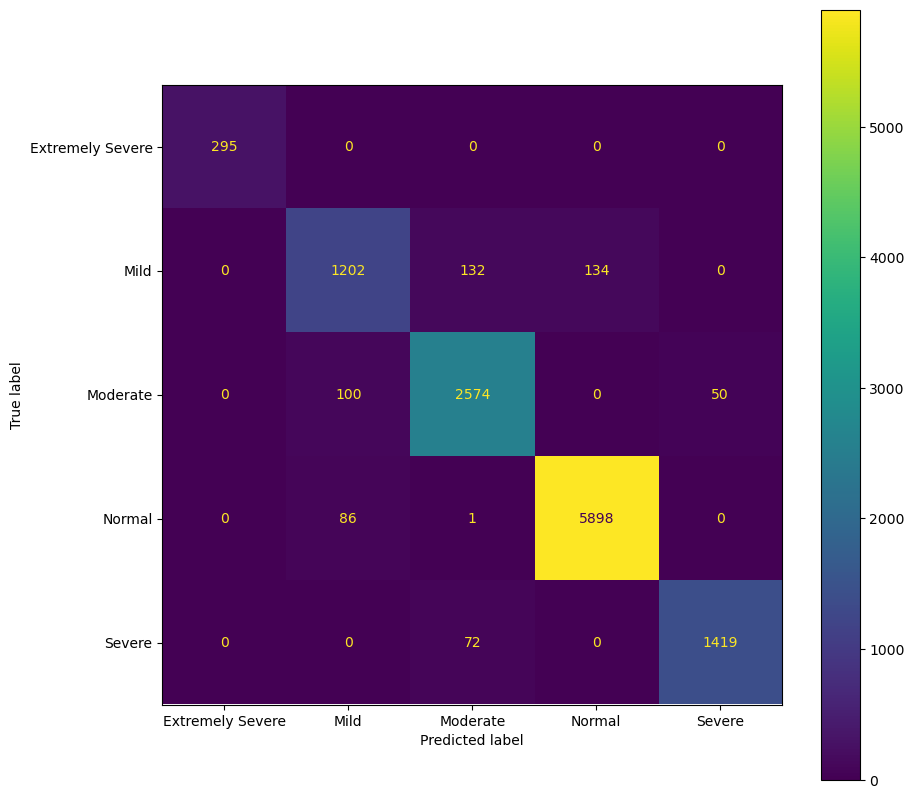

In [64]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(rand, X_test_scaled, y_test, ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)

**Support Vector Machines**

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000       295
            Mild     1.0000    1.0000    1.0000      1468
        Moderate     1.0000    1.0000    1.0000      2724
          Normal     1.0000    1.0000    1.0000      5985
          Severe     1.0000    1.0000    1.0000      1491

        accuracy                         1.0000     11963
       macro avg     1.0000    1.0000    1.0000     11963
    weighted avg     1.0000    1.0000    1.0000     11963



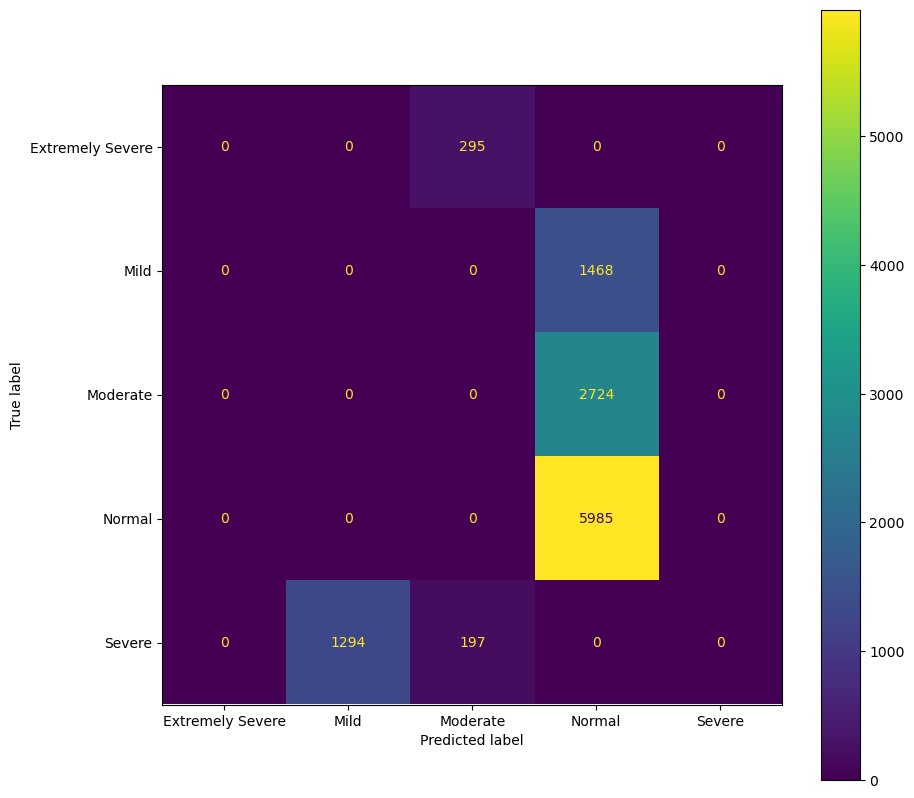

In [65]:
Svmc=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(Svm, X_test_scaled, y_test, ax=ax)
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)

In [66]:
Result_2={
                  'Model':['Random-Forest','SVM'],
                  'Accuracy(%)':[accu_ran*100,accu_svm*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_svm*100],
                  'Precision(%)':[Precision_ran*100,Precision_svm*100],
                  'Recall(%)':[Recall_ran*100,Recall_svm*100]
        
                    }
Result_Anxiety=pd.DataFrame(Result_2)    

In [67]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold       



# Results Achieved from above Modellings

In [68]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,97.7,97.7,97.7,97.7
1,SVM,100.0,100.0,100.0,100.0


In [69]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,98.4,98.4,98.4,98.4
1,SVM,100.0,100.0,100.0,100.0


In [70]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,95.2,95.2,95.1,95.2
1,SVM,100.0,100.0,100.0,100.0


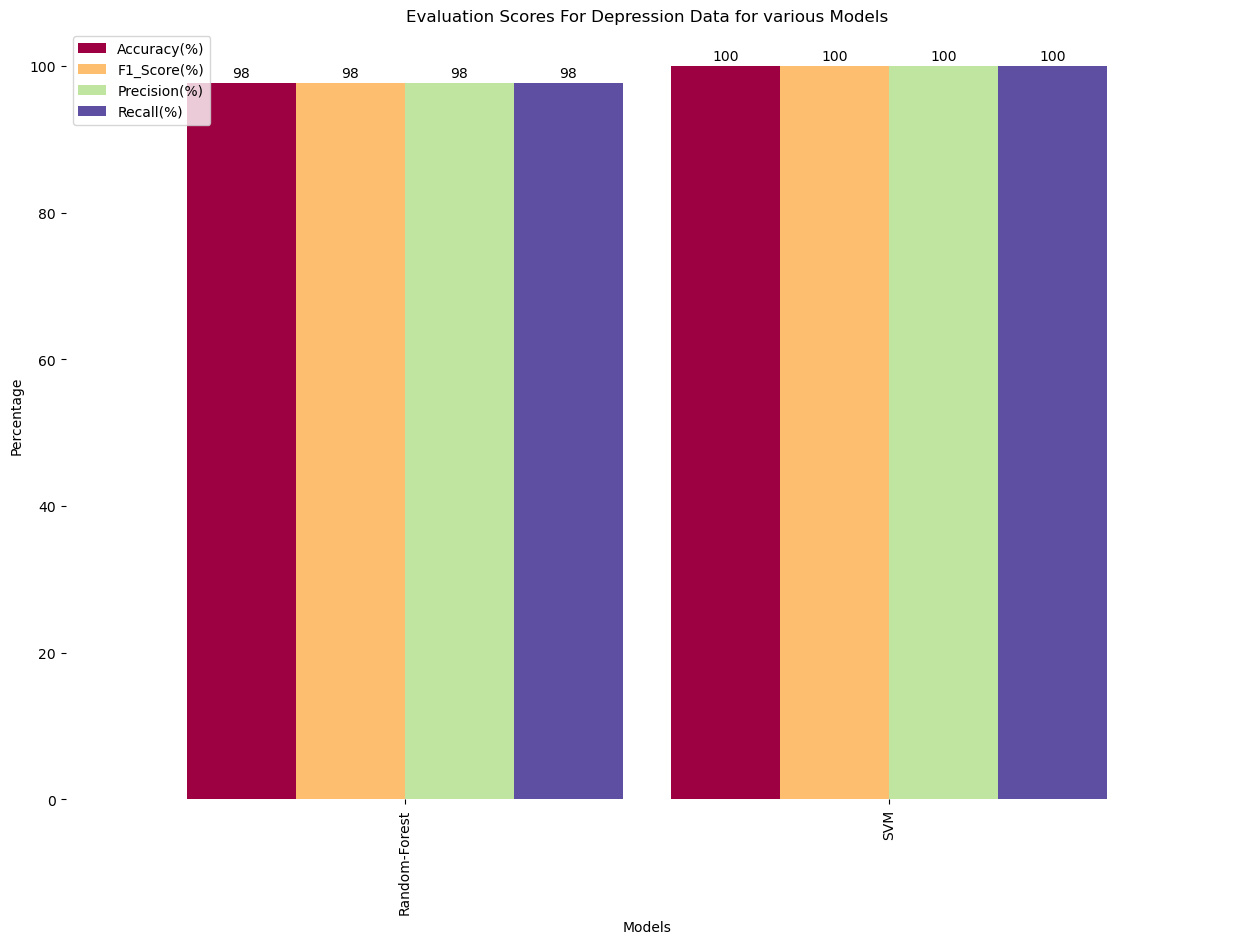

In [71]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

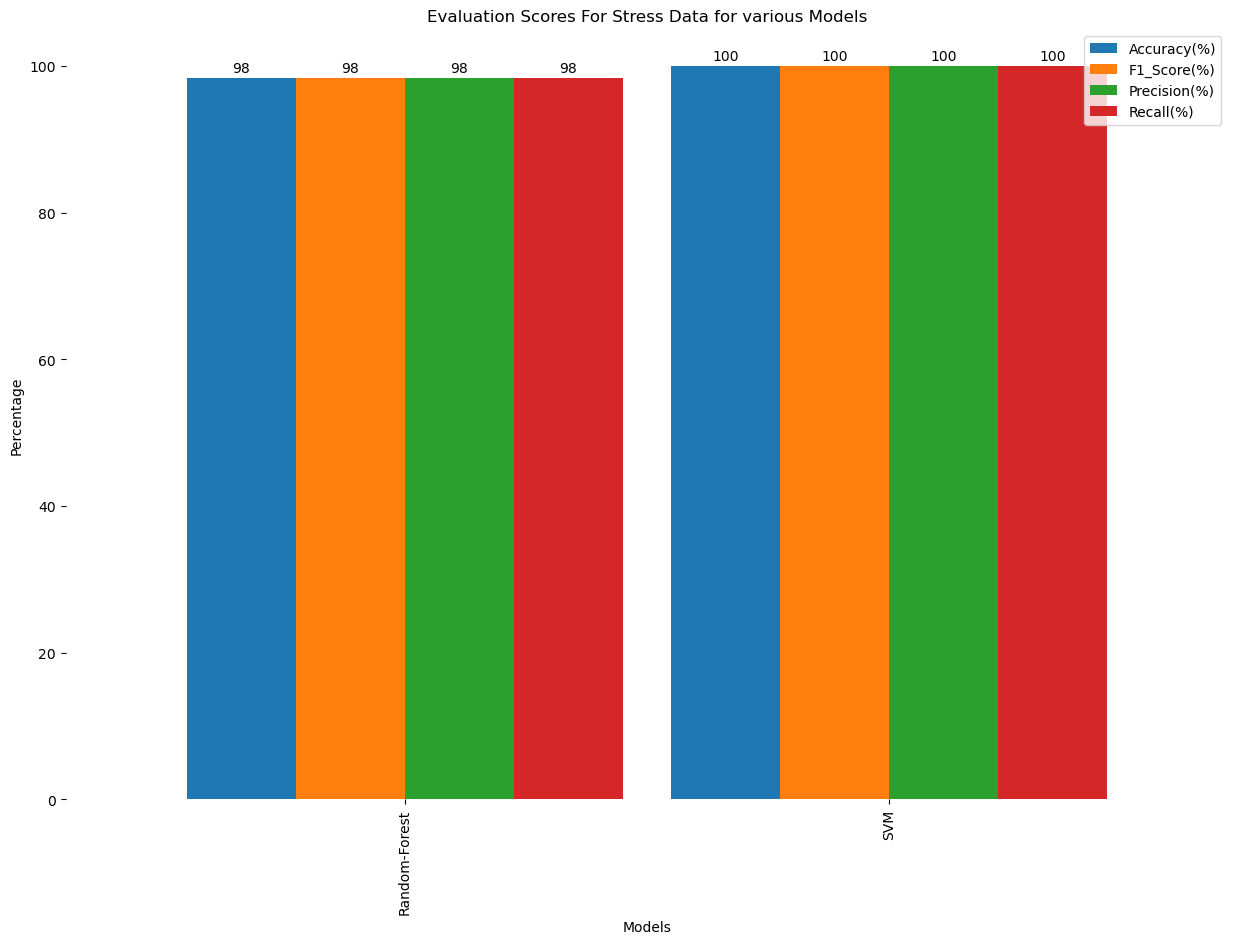

In [72]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Stress Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

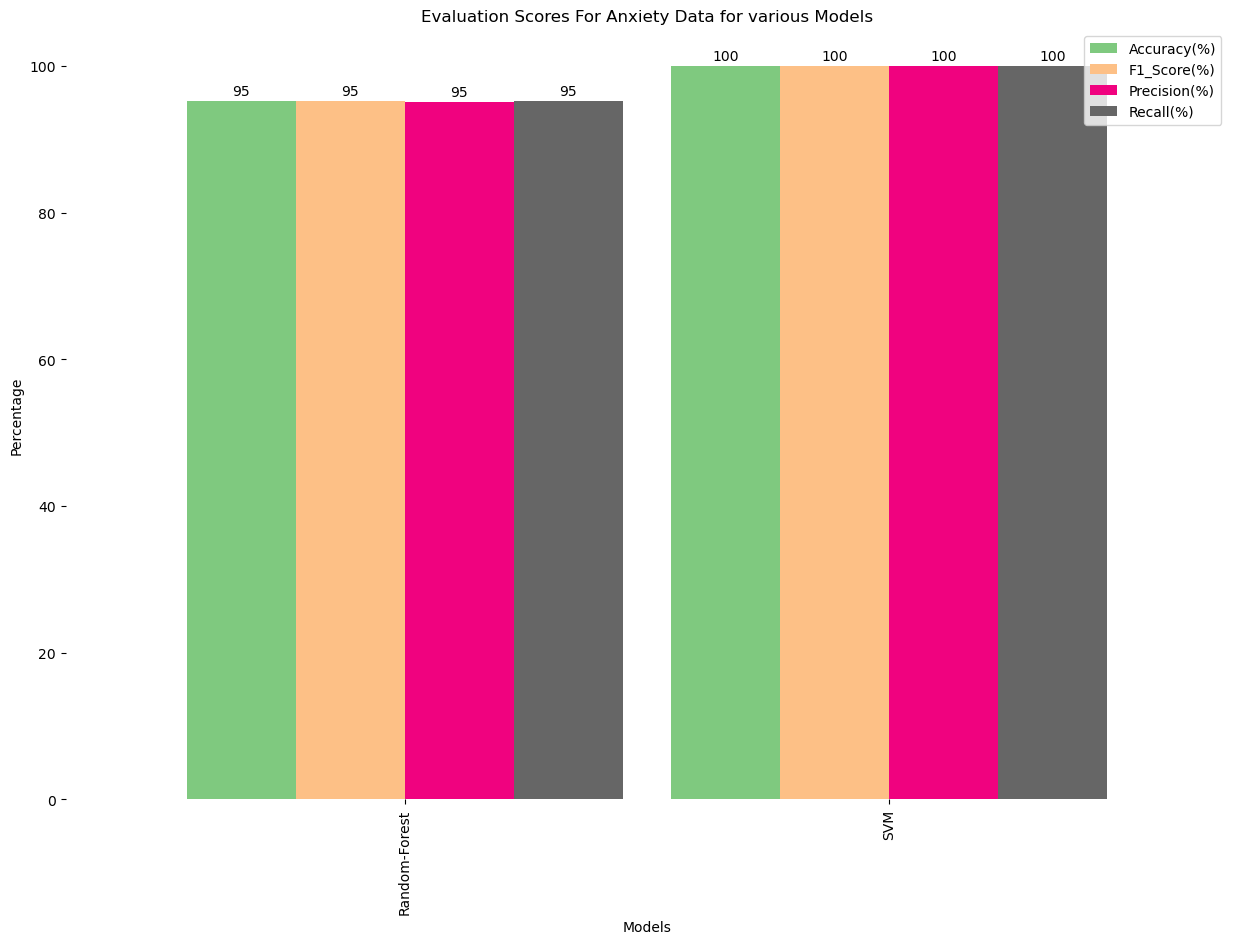

In [73]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Anxiety Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

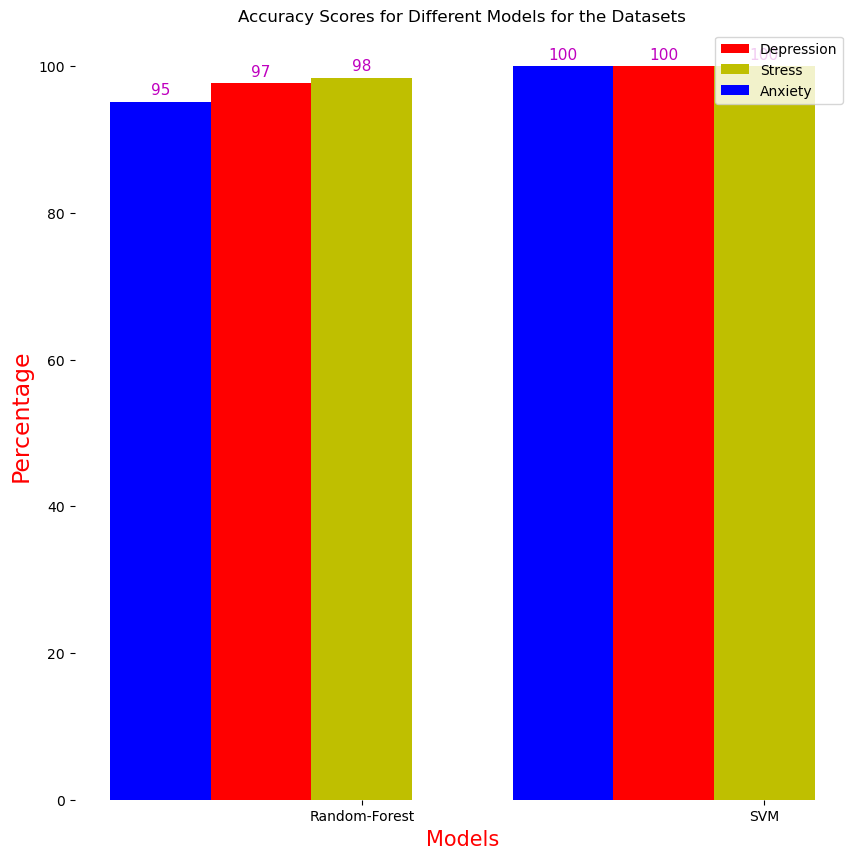

In [74]:
x=['Random-Forest','SVM']
widt=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Accuracy(%)'],widt,color='r')
bar2=plt.bar(X+widt,Result_Stress['Accuracy(%)'],widt,color='y')
bar3=plt.bar(X-widt,Result_Anxiety['Accuracy(%)'],widt,color='b')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='m', fontsize=11)
plt.xticks(X+widt,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Accuracy Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


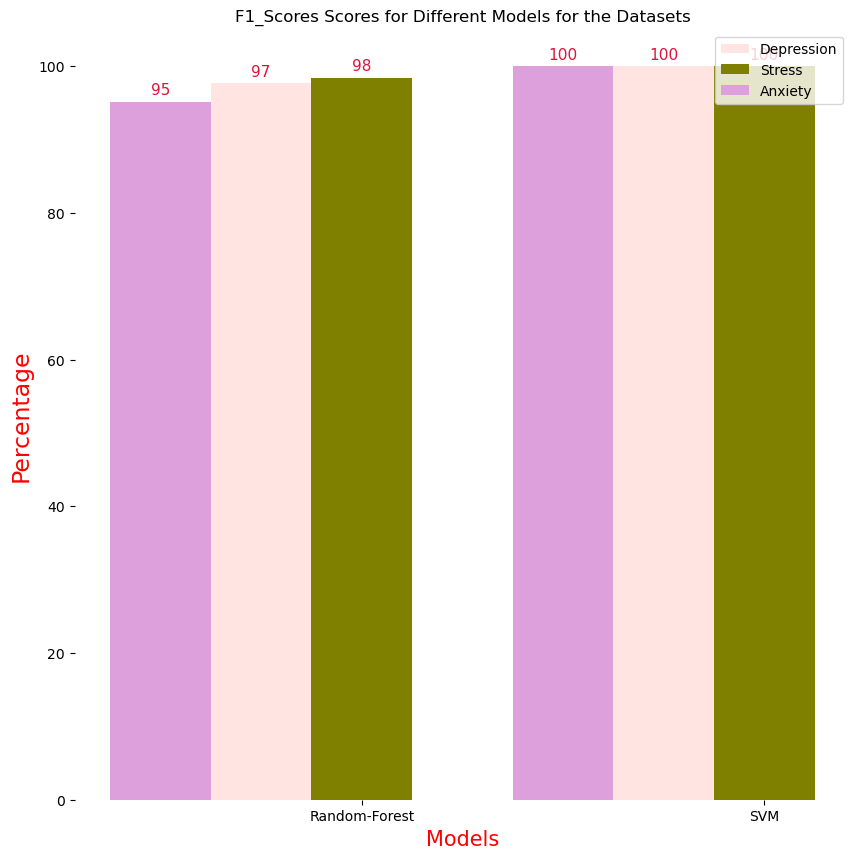

In [75]:
x=['Random-Forest','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['F1_Score(%)'],width,color='mistyrose')
bar2=plt.bar(X+width,Result_Stress['F1_Score(%)'],width,color='olive')
bar3=plt.bar(X-width,Result_Anxiety['F1_Score(%)'],width,color='plum')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='crimson', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('F1_Scores Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


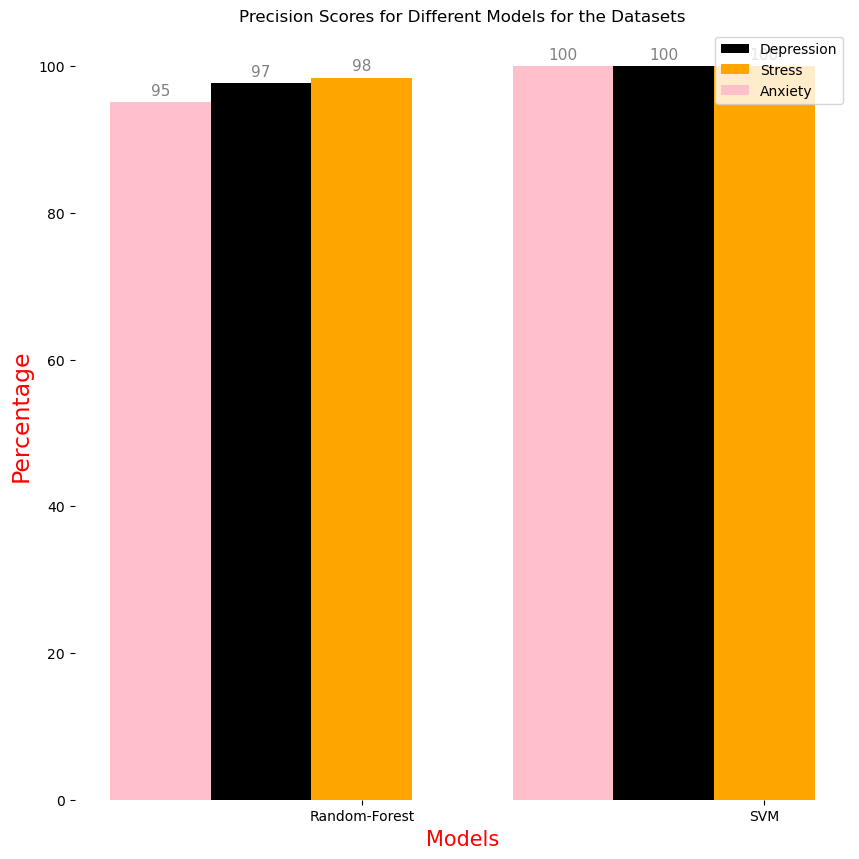

In [76]:
x=['Random-Forest','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Precision(%)'],width,color='black')
bar2=plt.bar(X+width,Result_Stress['Precision(%)'],width,color='orange')
bar3=plt.bar(X-width,Result_Anxiety['Precision(%)'],width,color='pink')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='gray', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Precision Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


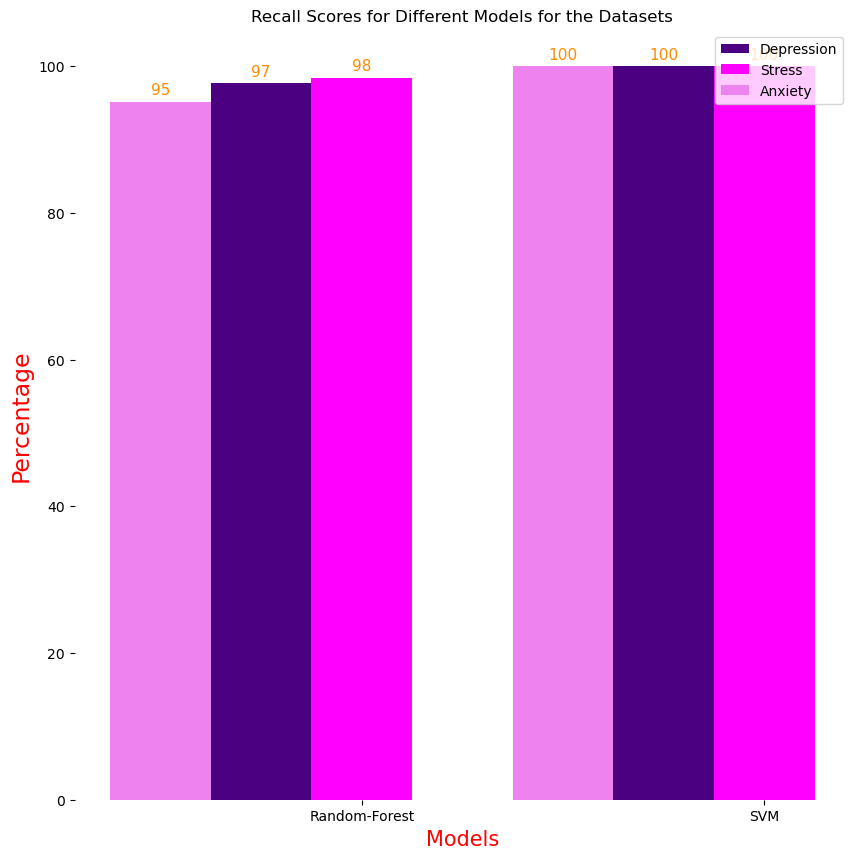

In [77]:
x=['Random-Forest','SVM']
width=0.25
X=np.arange(len(x))
plt.figure(figsize=(10,10))
bar1=plt.bar(X,Result_Depression['Recall(%)'],width,color='indigo')
bar2=plt.bar(X+width,Result_Stress['Recall(%)'],width,color='magenta')
bar3=plt.bar(X-width,Result_Anxiety['Recall(%)'],width,color='violet')
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, str(int(bar.get_height())), 
                 ha='center', color='darkorange', fontsize=11)
plt.xticks(X+width,x)
plt.legend( (bar1, bar2, bar3),('Depression', 'Stress', 'Anxiety'))
plt.title('Recall Scores for Different Models for the Datasets')
plt.ylabel('Percentage',fontsize=17,color='red')
plt.xlabel('Models',fontsize=15,color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


In [78]:
def pridictDepression(data):
    data_df = pd.DataFrame.from_dict([data])
    prediction = svm.predict(data_df)
    return prediction

data1 = {
    'Q3A': 0, 'Q5A': 2, 'Q10A': 3, 'Q13A': 1, 'Q16A': 0, 'Q17A': 2, 'Q21A': 1,
              'education': 1, 'gender': 1, 'married': 1, 'Age_Groups': 2
}
pridictDepression(data1)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['Severe'], dtype=object)

In [79]:
def pridictAnxiety(data):
    data_df = pd.DataFrame.from_dict([data])
    prediction = Svmc.predict(data_df)
    return prediction

data1 = {
    'Q2A': 0, 'Q4A': 2, 'Q7A': 3, 'Q9A': 1, 'Q15A': 0, 'Q19A': 2, 'Q20A': 1,
              'education': 1, 'gender': 1, 'married': 1, 'Age_Groups': 2
}
pridictDepression(data1)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['Severe'], dtype=object)

In [80]:
def pridictStress(data):
    data_df = pd.DataFrame.from_dict([data])
    prediction = Svm.predict(data_df)
    return prediction

data1 = {
    'Q1A': 0, 'Q6A': 1, 'Q8A': 0, 'Q11A': 1, 'Q12A': 0, 'Q14A': 2, 'Q18A': 1,
              'education': 1, 'gender': 1, 'married': 1, 'Age_Groups': 2
}
pridictDepression(data1)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['Moderate'], dtype=object)

In [81]:
import joblib

In [82]:
joblib.dump(svm, 'depression_model.pkl')
joblib.dump(Svmc, 'anxiety_model.pkl')
joblib.dump(Svm, 'stress_model.pkl')

['stress_model.pkl']